# Análise de Correspondência  Múltipla

### Importanção das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go
from itertools import combinations

### Importação e Ajuste dos Dados

O conjunto de dados trabalhado é o  "Credit Card Customers", disponível no Kaggle. Este conjunto de dados contém informações detalhadas sobre clientes de cartões de crédito.
link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download

In [2]:
df_credit = pd.read_csv("BankChurners.csv")
display(df_credit.head())

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df_credit.rename(columns={
    'CLIENTNUM': 'NumeroCliente',
    'Attrition_Flag': 'StatusCliente',
    'Customer_Age': 'IdadeCliente',
    'Gender': 'Genero',
    'Dependent_count': 'NumeroDependentes',
    'Education_Level': 'NivelEducacao',
    'Marital_Status': 'EstadoCivil',
    'Income_Category': 'CategoriaRenda',
    'Card_Category': 'CategoriaCartao',
    'Months_on_book': 'MesesConta',
    'Total_Relationship_Count': 'TotalRelacionamentos',
    'Months_Inactive_12_mon': 'MesesInativo12Meses',
    'Contacts_Count_12_mon': 'Contatos12Meses',
    'Credit_Limit': 'LimiteCredito',
    'Total_Revolving_Bal': 'SaldoRevolvente',
    'Avg_Open_To_Buy': 'MediaDisponivelParaCompra',
    'Total_Amt_Chng_Q4_Q1': 'TotalMudancaValorQ4Q1',
    'Total_Trans_Amt': 'TotalValorTransacoes',
    'Total_Trans_Ct': 'TotalNumeroTransacoes',
    'Total_Ct_Chng_Q4_Q1': 'TotalMudancaNumeroTransacoesQ4Q1',
    'Avg_Utilization_Ratio': 'MediaTaxaUtilizacao',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'ClassificadorNB1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'ClassificadorNB2'
}, inplace=True)



In [4]:
df_credit.head()

,NumeroCliente,StatusCliente,IdadeCliente,Genero,NumeroDependentes,NivelEducacao,EstadoCivil,CategoriaRenda,CategoriaCartao,MesesConta,...,LimiteCredito,SaldoRevolvente,MediaDisponivelParaCompra,TotalMudancaValorQ4Q1,TotalValorTransacoes,TotalNumeroTransacoes,TotalMudancaNumeroTransacoesQ4Q1,MediaTaxaUtilizacao,ClassificadorNB1,ClassificadorNB2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
dados = df_credit[['StatusCliente','IdadeCliente','Genero','NivelEducacao','EstadoCivil','CategoriaRenda','CategoriaCartao']]

### Categorização das Variáveis

A variável idade do banco de dados é métricas, como somente podemos ter variáveis categóricas,foi categorizada utilizando um critério quantitativo

In [6]:
dados.head()

,StatusCliente,IdadeCliente,Genero,NivelEducacao,EstadoCivil,CategoriaRenda,CategoriaCartao
0,Existing Customer,45,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue


In [7]:
dados['IdadeCliente'] = pd.qcut(dados['IdadeCliente'], 3, labels=list(['menores_idades', 'idades_medias', 'maiores_idades']))

C:\Users\Luciane\AppData\Local\Temp\ipykernel_13084\4265429339.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
print("StatusCliente:")
print(dados['StatusCliente'].value_counts())
print("\nIdadeCliente:")
print(dados['IdadeCliente'].value_counts())
print("\nGenero:")
print(dados['Genero'].value_counts())
print("\nNivelEducacao:")
print(dados['NivelEducacao'].value_counts())
print("\nEstadoCivil:")
print(dados['EstadoCivil'].value_counts())
print("\nCategoriaRenda:")
print(dados['CategoriaRenda'].value_counts())
print("\nCategoriaCartao:")
print(dados['CategoriaCartao'].value_counts())


StatusCliente:
StatusCliente
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

IdadeCliente:
IdadeCliente
menores_idades    3675
idades_medias     3374
maiores_idades    3078
Name: count, dtype: int64

Genero:
Genero
F    5358
M    4769
Name: count, dtype: int64

NivelEducacao:
NivelEducacao
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

EstadoCivil:
EstadoCivil
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

CategoriaRenda:
CategoriaRenda
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

CategoriaCartao:
CategoriaCartao
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


### Analisando as tabelas de contingência

In [9]:
for item in list(combinations(dados.columns, 2)):
    #print(item, "\n")
    tabela = pd.crosstab(dados[item[0]], dados[item[1]])
    
    print(tabela)
    
    chi2, pvalor, gl, freq_esp = chi2_contingency(tabela)

    print(f"estatística qui²: {round(chi2, 2)}")
    print(f"p-valor da estatística: {round(pvalor, 4)}", "\n")

IdadeCliente       menores_idades  idades_medias  maiores_idades
StatusCliente                                                   
Attrited Customer             565            556             506
Existing Customer            3110           2818            2572
estatística qui²: 2.05
p-valor da estatística: 0.3589 

Genero                F     M
StatusCliente                
Attrited Customer   930   697
Existing Customer  4428  4072
estatística qui²: 13.87
p-valor da estatística: 0.0002 

NivelEducacao      College  Doctorate  Graduate  High School  Post-Graduate  \
StatusCliente                                                                 
Attrited Customer      154         95       487          306             92   
Existing Customer      859        356      2641         1707            424   

NivelEducacao      Uneducated  Unknown  
StatusCliente                           
Attrited Customer         237      256  
Existing Customer        1250     1263  
estatística qui²: 12.51
p-

Na análise de correspondência múltipla (MCA), desejamos incluir variáveis que apresentem uma associação significativa entre si. Para isso, consideraremos apenas as variáveis cujo p-valor seja menor que o nível de significância de 0,05.

In [63]:
categorical_columns = [ 'IdadeCliente', 'Genero',  'CategoriaRenda', 'CategoriaCartao']


significant_columns = set()

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(dados[col1], dados[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if p < 0.05:  
                significant_columns.add(col1)
                significant_columns.add(col2)

# Criar o novo DataFrame com colunas significativas
dados_mca = dados[list(significant_columns)]

# Exibir o novo DataFrame
print(dados_mca.head())


  Genero CategoriaCartao  CategoriaRenda    IdadeCliente
0      M            Blue     $60K - $80K   idades_medias
1      F            Blue  Less than $40K   idades_medias
2      M            Blue    $80K - $120K  maiores_idades
3      F            Blue  Less than $40K  menores_idades
4      M            Blue     $60K - $80K  menores_idades


In [64]:
dados.head()

,StatusCliente,IdadeCliente,Genero,NivelEducacao,EstadoCivil,CategoriaRenda,CategoriaCartao
0,Existing Customer,idades_medias,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,idades_medias,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,maiores_idades,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,menores_idades,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,menores_idades,M,Uneducated,Married,$60K - $80K,Blue


In [65]:
# Exibir o novo DataFrame
display(dados_mca.head())

,Genero,CategoriaCartao,CategoriaRenda,IdadeCliente
0,M,Blue,$60K - $80K,idades_medias
1,F,Blue,Less than $40K,idades_medias
2,M,Blue,$80K - $120K,maiores_idades
3,F,Blue,Less than $40K,menores_idades
4,M,Blue,$60K - $80K,menores_idades


###  Elaborando a MCA

In [66]:
mca = prince.MCA(n_components=3).fit(dados_mca)

Quantidade total de dimensões

In [67]:
# Quantidade de dimensões = qtde total de categorias - qtde de variáveis

# Quantidade total de categorias
mca.J_

# Quantidade de variáveis na análise
mca.K_

# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_

# Resumo das informações
print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 15
quantidade de variáveis: 4
quantidade de dimensões: 11


Obtendo os eigenvalues

In [68]:
tabela_autovalores = mca.eigenvalues_summary
display(tabela_autovalores)

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.464,16.88%,16.88%
1,0.269,9.79%,26.68%
2,0.263,9.55%,36.23%


Inércia principal total

In [69]:
# Soma de todos os autovalores (todas as dimensões existentes)

print(mca.total_inertia_)

2.7499999999999023


 Obtendo as coordenadas principais das categorias das variáveis

In [70]:
coord_burt = mca.column_coordinates(dados_mca)

print(coord_burt)

                                      0         1         2
Genero_F                      -0.899703 -0.005392  0.061009
Genero_M                       1.010822  0.006058 -0.068544
CategoriaCartao_Blue          -0.051617  0.016836 -0.127882
CategoriaCartao_Gold           0.964387  0.043018  3.308205
CategoriaCartao_Platinum       0.383905  6.567031  7.562403
CategoriaCartao_Silver         0.662187 -0.531885  1.210262
CategoriaRenda_$120K +         1.214802  2.162563  0.204413
CategoriaRenda_$40K - $60K    -0.086702 -0.581692 -0.462547
CategoriaRenda_$60K - $80K     1.204726 -0.733415  0.519465
CategoriaRenda_$80K - $120K    1.199477 -0.018038 -0.475239
CategoriaRenda_Less than $40K -0.898106  0.062459 -0.267076
CategoriaRenda_Unknown        -0.953266  0.272090  1.467275
IdadeCliente_menores_idades    0.003931 -0.680059 -0.326807
IdadeCliente_idades_medias     0.029890 -0.190728  0.816447
IdadeCliente_maiores_idades   -0.037458  1.021031 -0.504768


Obtendo as coordenadas-padrão das categorias das variáveis


In [71]:
coord_padrao = mca.column_coordinates(dados_mca)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)


                                      0          1          2
Genero_F                      -1.320343  -0.010390   0.119068
Genero_M                       1.483413   0.011673  -0.133774
CategoriaCartao_Blue          -0.075750   0.032441  -0.249580
CategoriaCartao_Gold           1.415269   0.082890   6.456422
CategoriaCartao_Platinum       0.563393  12.653752  14.759081
CategoriaCartao_Silver         0.971780  -1.024869   2.361995
CategoriaRenda_$120K +         1.782760   4.166957   0.398940
CategoriaRenda_$40K - $60K    -0.127238  -1.120838  -0.902724
CategoriaRenda_$60K - $80K     1.767974  -1.413188   1.013809
CategoriaRenda_$80K - $120K    1.760270  -0.034756  -0.927495
CategoriaRenda_Less than $40K -1.317999   0.120349  -0.521236
CategoriaRenda_Unknown        -1.398948   0.524279   2.863591
IdadeCliente_menores_idades    0.005769  -1.310378  -0.637809
IdadeCliente_idades_medias     0.043864  -0.367506   1.593410
IdadeCliente_maiores_idades   -0.054970   1.967383  -0.985126


Obtendo as coordenadas das observações do banco de dados

In [72]:
# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(dados_mca)

print(coord_obs)

              0         1         2
0      0.804875 -0.434145  0.555966
1     -0.667557 -0.056276  0.235416
2      0.778241  0.494185 -0.573993
3     -0.677081 -0.291994 -0.322389
4      0.795352 -0.669863 -0.001838
...         ...       ...       ...
10122  0.331072 -0.361058  0.076833
10123  0.321549 -0.596776 -0.480972
10124 -0.667557 -0.056276  0.235416
10125  0.321549 -0.596776 -0.480972
10126 -0.415198 -0.556322  0.330504

[10127 rows x 3 columns]


Plotando o mapa perceptual (coordenadas-padrão)

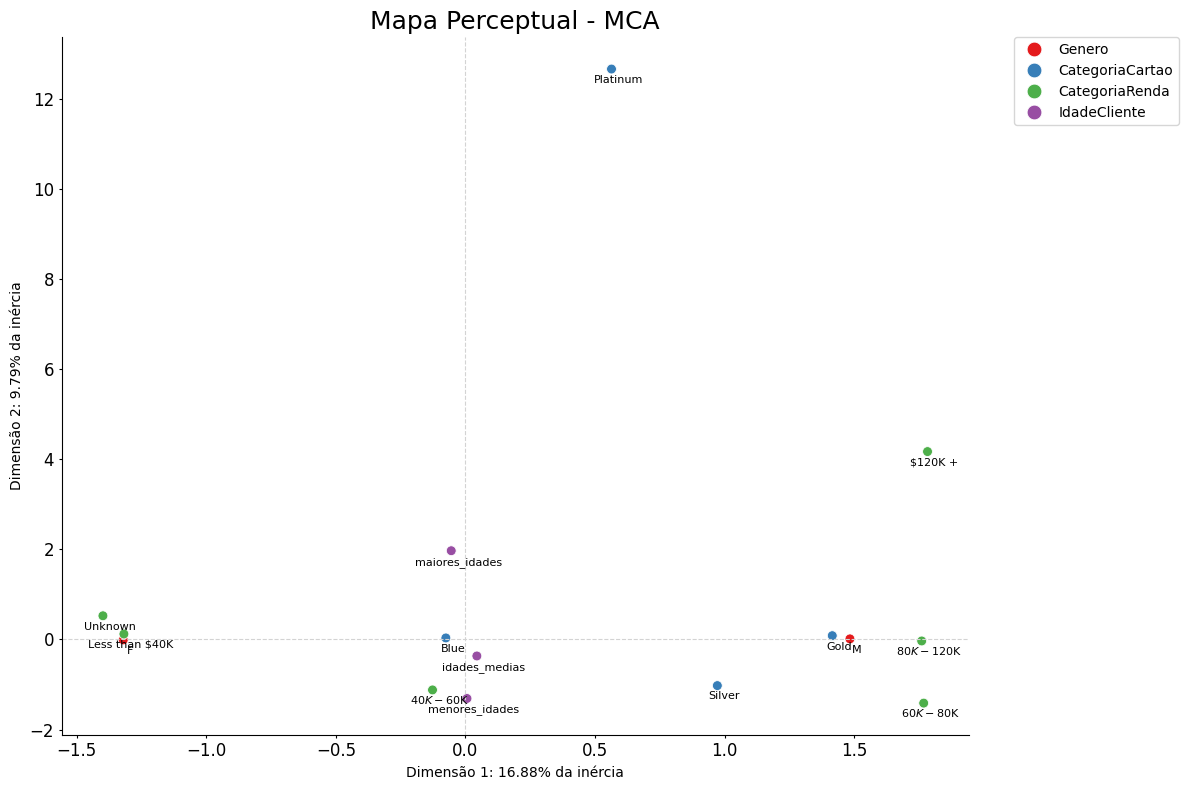

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuração dos dados
chart = coord_padrao.reset_index()
nome_categ = [dados_mca[col].sort_values().unique() for col in dados_mca]
categorias = pd.DataFrame(nome_categ).stack().reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True)[0])

# DataFrame final para o gráfico de MCA
chart_df_mca = pd.DataFrame({
    'categoria': chart['index'],
    'obs_x': chart[0],
    'obs_y': chart[1],
    'variavel': var_chart,
    'categoria_id': categorias[0]
})

# Função para adicionar rótulos aos pontos do gráfico
def label_point(x, y, val, ax):
    for i, txt in enumerate(val):
        ax.annotate(txt, (x[i], y[i]), xytext=(5, -10), textcoords='offset points', fontsize=8, ha='center')

# Configuração do tamanho da figura e dos eixos
plt.figure(figsize=(12, 8))

# Plotagem do gráfico de dispersão com Seaborn
sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=50, palette='Set1')

# Adicionando os rótulos aos pontos do gráfico
label_point(chart_df_mca['obs_x'], chart_df_mca['obs_y'], chart_df_mca['categoria_id'], plt.gca())

# Estilização do gráfico
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10, markerscale=1.5)
plt.title("Mapa Perceptual - MCA", fontsize=18)
plt.xlabel(f"Dimensão 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=10)
plt.ylabel(f"Dimensão 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=10)

# Exibição do gráfico
plt.tight_layout()
plt.show()


Cartão Platinum:

O ponto "Platinum" está bem isolado à direita do gráfico, sugerindo que os clientes com cartão Platinum têm características bastante distintas.
A proximidade com faixas de renda mais altas, como "$120K +", indica que clientes Platinum tendem a ter rendas significativamente mais altas.
A distância dos outros grupos sugere que esses clientes têm um perfil exclusivo, possivelmente relacionado a outros fatores que não são explicitamente visíveis no gráfico.
Cartão Gold:

O ponto "Gold" está localizado à direita, mas não tão distante quanto "Platinum".
A proximidade com a faixa de renda "60K – 80K" sugere que os clientes com cartão Gold geralmente têm rendas intermediárias a altas.
A posição relativamente isolada ainda indica um perfil distinto, embora não tão exclusivo quanto o dos clientes Platinum.
Cartão Silver:

O ponto "Silver" está acima e à direita, mas não tão afastado quanto os cartões Platinum e Gold.
Isso sugere que os clientes Silver têm um perfil intermediário, com características que não são tão exclusivas quanto as dos clientes Platinum ou Gold.
A associação com rendas não é tão clara, indicando que pode haver uma maior variabilidade nos rendimentos dos clientes Silver.
Cartão Blue:

O ponto "Blue" está próximo ao centro do gráfico.
A proximidade com "Existing Customer", "High School", "Graduate", "Single" e "Unknown" indica que os clientes com cartão Blue podem ser mais comuns, com uma distribuição mais homogênea em termos de estado civil, nível de educação e status do cliente.
A centralidade sugere que os clientes Blue não possuem características extremamente distintas em comparação com outras categorias de cartão.
Clientes desconhecidos ou não categorizados:

Alguns pontos, como "Unknown" no gênero, estado civil, e status do cliente, estão dispersos, indicando que há uma falta de informação consistente sobre esses clientes, o que dificulta a definição de perfis claros.
Em resumo, os perfis de clientes para cada tipo de cartão podem ser descritos da seguinte forma:

Platinum: Clientes de alta renda, com características bastante distintas.
Gold: Clientes de renda intermediária a alta, com um perfil relativamente distinto.
Silver: Clientes com perfil intermediário, variabilidade em rendas.
Blue: Clientes mais comuns, com uma distribuição homogênea em termos de características.